### Pertama kita import dulu library yang akan digunakan disini saya menggunakan pandas, matplotlib, seaborn, dan numpy)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

### kemudian kita read datanya, disini saya menggunakan decoder ISO-8859-1 karena ada error jika menggunakan decoder default (UTF-8)
### kemudian untuk mencari data yang ingin divisualisasikan saya menggunakan df.head() untuk melihat kolom yang sekiranya bisa divisualkan

In [2]:
df = pd.read_csv("dataGames.csv",encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,id,slug,name,released,tba,background_image,rating,rating_top,reviews_text_count,metacritic,playtime,suggestions_count,updated,user_game,reviews_count
0,1,1,grand-theft-auto-v,Grand Theft Auto V,2013-09-17,0,https://media.rawg.io/media/games/20a/20aa03a1...,4.47,5,57,92.0,74,421,2023-09-05T08:10:07,NaN,6610
1,2,2,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,2015-05-18,0,https://media.rawg.io/media/games/618/618c2031...,4.66,5,69,92.0,45,671,2023-09-06T16:21:13,NaN,6332
2,3,3,portal-2,Portal 2,2011-04-18,0,https://media.rawg.io/media/games/2ba/2bac0e87...,4.61,5,32,95.0,11,545,2023-09-05T19:33:39,NaN,5470
3,4,4,counter-strike-global-offensive,Counter-Strike: Global Offensive,2012-08-21,0,https://media.rawg.io/media/games/736/73619bd3...,3.57,4,24,81.0,65,587,2023-09-06T04:07:56,NaN,3369
4,5,5,tomb-raider,Tomb Raider (2013),2013-03-05,0,https://media.rawg.io/media/games/021/021c4e21...,4.05,4,12,86.0,10,643,2023-09-05T11:56:12,NaN,3781


### df.shape untuk melihat banyaknya row dan col yang ada

In [3]:
df.shape

(4000, 16)

# disini saya mengubah format dari kolom released karena sebelumnya object menjadi datetime dan hanya mengambil tahunnya

In [4]:
df['released'] = pd.to_datetime(df['released']).dt.strftime('%Y')

### karena data saya banyak jadi disini saya berniat untuk mengsortir data yang memiliki value lebih dari 10

In [5]:
# Menghitung data yang sama
value_counts = df['released'].value_counts()

# Menghapus data yang memiliki value kurang dari 10
to_remove = value_counts[value_counts <= 10].index

# Menyimpan data yang memiliki value lebih dari 10
df = df[~df.released.isin(to_remove)]

In [6]:
released_value = df['released'].value_counts().sort_index()

### visualisasi data menggunakan bar plot

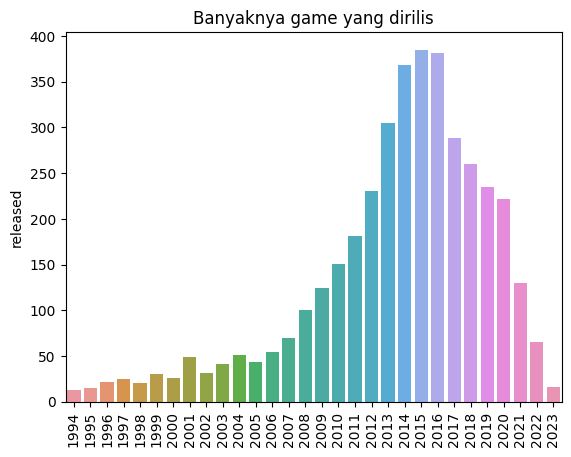

In [87]:
sns.barplot(x=released_value.index,
            y=released_value)
plt.xticks(rotation=90)
plt.title("Banyaknya game yang dirilis")
plt.show()

visualisasi diatas menggunakan diagram batang dimana data-x = tahun game dirilis, sedangkan data-y = banyak game yang dirilis tahun itu
seperti yang bisa diliat diatas, tiap tahunnya makin banyak game yang dirilis dimana puncaknya tahun 2016 tetapi sayangnya pada tahun 2021
turun secara drastis dikarenakan wabah yang melanda

### Visualisasi data menggunakan pie chart

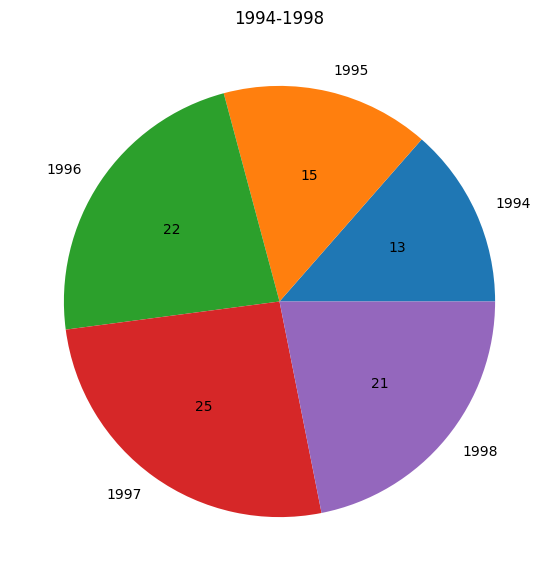

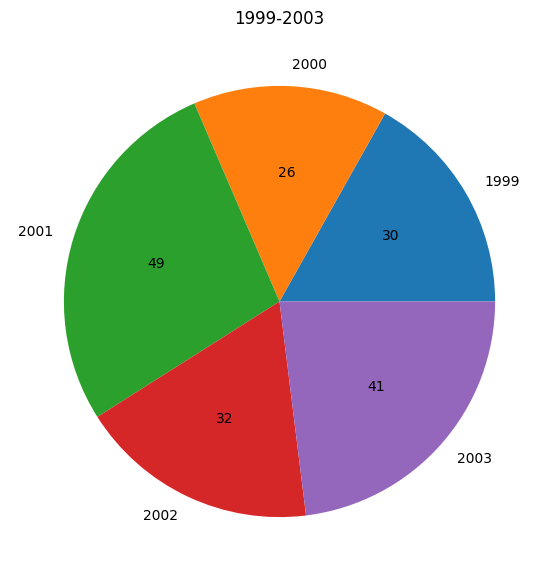

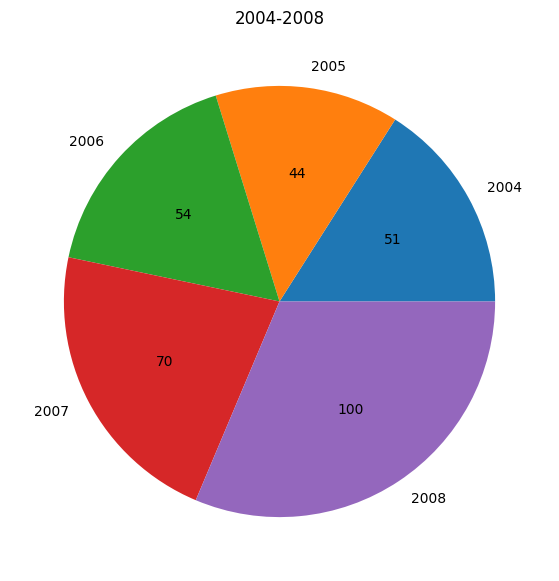

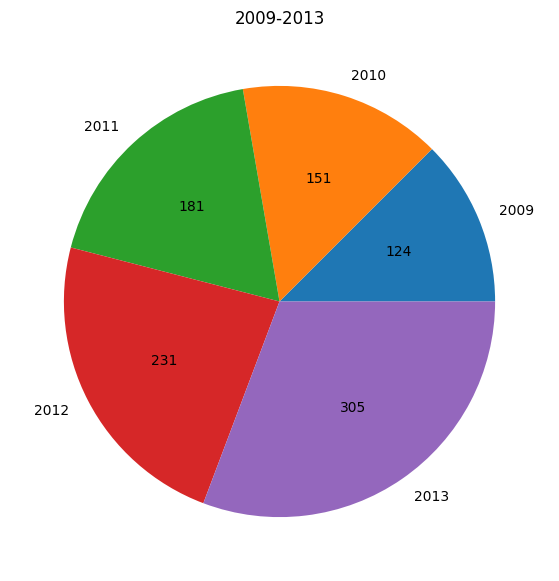

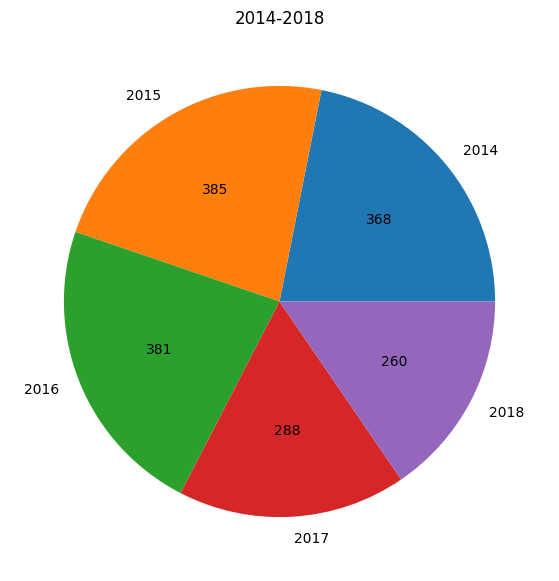

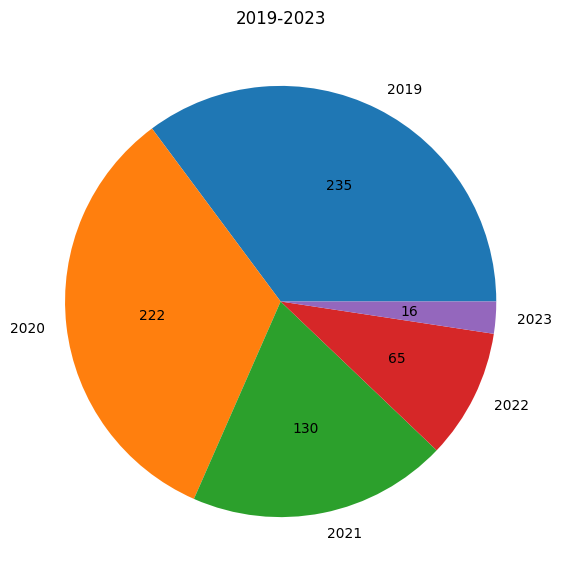

In [80]:
n = 1

data = released_value.to_dict()

temp_key=[]
temp_value=[]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

for i,j in data.items():
    temp_key.append(i)
    temp_value.append(j)
    if n % 5 == 0:
        fig = plt.figure(figsize =(10, 7))
        plt.pie(temp_value, labels = temp_key ,autopct =autopct_format(temp_value))
        judul = temp_key[0] + "-" +temp_key[4]
        plt.title(judul)
        temp_key.clear()
        temp_value.clear()
    n+=1

disini saya membagi data menjadi beberapa bagian berdasarkan periode 5 tahun, tujuannya adalah agar bisa membandingkan banyaknya game yang dirilis dalam periode 5 tahun\
seperti yang bisa diliat ditas: \
1994-1998 : didominasi oleh tahun 1997 dengan game sebanyak 25\
1999-2003 : didominasi oleh tahun 2001 dengan game sebanyak 49\
2004-2008 : didominasi oleh tahun 2008 dengan game sebanyak 100\
2009-2013 : didomniasi oleh tahun 2013 dengan game sebanyak 305\
2014-2018 : didominasi oleh tahun 2015 dengan game sebanyak 385\
2019-2023 : didominasi oleh tahun 2019 dengan game sebanyak 235

### disini saya mengubah data pada baris menjadi kolom

In [42]:
released_group = df.groupby('released').mean()
transpose_df= released_group.transpose()
released_group.transpose()

released,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Unnamed: 0,1926.307692,2128.000000,2261.590909,1887.560000,1901.714286,1870.200000,1894.038462,2078.775510,2003.375000,1919.048780,...,2057.997283,2081.462338,2072.992126,1867.277778,1956.826923,2240.174468,2275.423423,2439.276923,2215.600000,2293.375000
id,1926.307692,2128.000000,2261.590909,1887.560000,1901.714286,1870.200000,1894.038462,2078.775510,2003.375000,1919.048780,...,2057.997283,2081.462338,2072.992126,1867.277778,1956.826923,2240.174468,2275.423423,2439.276923,2215.600000,2293.375000
tba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004255,0.004505,0.000000,0.000000,0.187500
rating,3.509231,3.617333,3.505909,3.826400,3.934762,3.742667,3.738846,3.746939,3.925000,3.673659,...,3.002799,3.048753,3.197822,3.368542,3.428115,3.465149,3.471802,3.618923,3.715692,4.042500
rating_top,3.615385,3.800000,3.636364,4.120000,4.095238,3.933333,4.038462,3.918367,4.281250,3.951220,...,2.991848,3.075325,3.291339,3.559028,3.592308,3.706383,3.743243,3.900000,3.923077,4.562500
reviews_text_count,1.692308,1.000000,1.136364,1.160000,2.142857,1.233333,1.576923,1.816327,1.812500,1.463415,...,1.285326,1.719481,2.225722,3.090278,3.696154,3.242553,3.036036,3.292308,3.015385,4.125000
metacritic,83.000000,72.000000,90.833333,81.833333,85.200000,82.857143,83.500000,81.416667,79.866667,75.969697,...,73.282178,75.219626,76.017241,77.392670,76.962500,76.043210,76.500000,76.788462,79.901961,84.692308
playtime,2.307692,1.600000,4.090909,1.960000,2.761905,32.766667,3.038462,2.204082,4.625000,2.195122,...,3.986413,4.371429,4.511811,4.357639,4.026923,3.446809,3.481982,5.269231,5.723077,28.187500
suggestions_count,431.153846,419.400000,415.500000,487.840000,474.571429,409.400000,472.500000,435.163265,441.156250,462.560976,...,403.222826,385.106494,383.860892,388.340278,339.842308,352.063830,350.833333,400.623077,356.184615,491.437500
user_game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### visualisasi data line plot

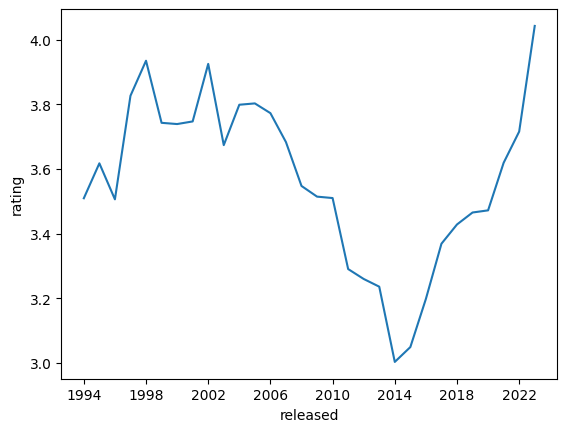

In [44]:
sns.lineplot(transpose_df.loc['rating','1994':])
plt.xticks(np.arange(1994,2023,4).astype('str'))
plt.show()

data diatas merupakan rata-rata rating yang diberikan oleh user di berbagai game pada tahun tertentu. Data diatas menunjukkan bahwa game pada tahun 2014 memiliki rata-rata rating yang cukup buruk bahkan lebih rendah dibanding tahun 1996. hal ini bisa disebabkan karena tingginya ekspetasi user terhadap game baru dimana pada tahun itu memang banyak game baru yang dirilis hanya saja tidak memenuhi ekspetasi user

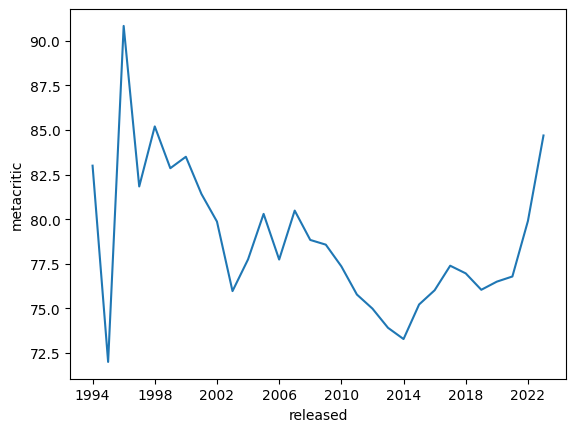

In [45]:
sns.lineplot(transpose_df.loc['metacritic','1994':])
plt.xticks(np.arange(1994,2023,4).astype('str'))
plt.show()

untuk data metacritic sendiri berasal dari web 'metacritic' jadi yang bisa memberikan review hanya user yang memiliki akun sehingga seperti yang bisa diliat diatas data tahun 1994 sangat anjlok karena sedikitnya user

In [68]:
df1= df.head(3959)
pd.set_option('display.max_rows', None)

display(df1[df1['released']=='2014'].sort_values(by='rating', ascending=True))

,Unnamed: 0,id,slug,name,released,tba,background_image,rating,rating_top,reviews_text_count,metacritic,playtime,suggestions_count,updated,user_game,reviews_count
3203,3204,3204,humanity-asset,Humanity Asset,2014,0,https://media.rawg.io/media/screenshots/5f5/5f53adb958350eedb11a492482fdeffe.jpg,1.34,1,0,NaN,4,428,2023-05-29T12:24:52,NaN,29
3516,3517,3517,rover-rescue,Rover Rescue,2014,0,https://media.rawg.io/media/screenshots/d13/d131365a7f871aca8240e9e203a04cc5.jpg,1.38,1,0,NaN,1,346,2019-09-17T05:15:07,NaN,16
3833,3834,3834,the-forgotten-ones,The Forgotten Ones,2014,0,https://media.rawg.io/media/screenshots/7b0/7b08198af2d7fe16ae62b58784085e27.jpg,1.45,1,0,NaN,1,406,2023-08-07T23:10:38,NaN,29
2755,2756,2756,cobi-treasure-deluxe,Cobi Treasure Deluxe,2014,0,https://media.rawg.io/media/screenshots/876/87644f649b5adaced9ea431de4e359b9.jpg,1.48,1,0,NaN,1,231,2023-07-29T14:58:54,NaN,25
2955,2956,2956,numba-deluxe,Numba Deluxe,2014,0,https://media.rawg.io/media/screenshots/fa5/fa5a89e2e92ee14965f66bcca4841eff.jpg,1.53,1,0,NaN,1,162,2019-09-17T04:41:16,NaN,19
3040,3041,3041,drones-the-human-condition,"Drones, The Human Condition",2014,0,https://media.rawg.io/media/screenshots/fae/faef87e072c9156cab9acaf8a3bef244.jpg,1.54,1,0,NaN,4,241,2023-05-01T13:41:24,NaN,13
3082,3083,3083,pressured,Pressured,2014,0,https://media.rawg.io/media/screenshots/cd0/cd0a46ccb924ea0a5087aef0b382dfba.jpg,1.55,1,0,NaN,3,210,2023-07-29T14:59:08,NaN,22
3789,3790,3790,robotex,Robotex,2014,0,https://media.rawg.io/media/screenshots/ae8/ae8acbb93e731df8c8924822a9e027f3.jpg,1.55,1,0,NaN,3,408,2022-09-29T23:34:09,NaN,31
2347,2348,2348,racer-8,Racer 8,2014,0,https://media.rawg.io/media/screenshots/c7d/c7d111f0aad385c5687735bd3ade7677.jpg,1.56,1,0,NaN,3,342,2023-07-30T17:46:07,NaN,43
3684,3685,3685,nux,Nux,2014,0,https://media.rawg.io/media/screenshots/2dd/2ddec73965f0d84af22fc3f4103d70d8.jpg,1.57,1,0,NaN,4,101,2023-05-11T15:53:09,NaN,21


untuk data diatas saya menampilkan game-game yang dirilis pada tahun 2014 seperti yang bisa diliat banyak sekali game yang mendapat rating jelek


### disini saya membuat sebuah korelasi data berdasarkan tahun 1994-2023

In [72]:
year_total_corr = transpose_df.loc[:, '1994':'2023'].corr()
year_total_corr

released,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
released,,,,,,,,,,,,,,,,,,,,,
1994,1.000000,0.999537,0.999513,0.999162,0.995947,0.999707,0.998401,0.999661,0.997334,0.999197,...,0.999694,0.999279,0.999070,0.998685,0.998308,0.998700,0.998453,0.998448,0.998608,0.999361
1995,0.999537,1.000000,0.999794,0.997483,0.993130,0.998907,0.996364,0.998902,0.995310,0.997645,...,0.999398,0.998891,0.998511,0.997359,0.997646,0.999179,0.999441,0.999634,0.999596,0.999840
1996,0.999513,0.999794,1.000000,0.997673,0.994332,0.999280,0.996994,0.999369,0.996497,0.998074,...,0.999779,0.999554,0.999300,0.998279,0.998745,0.999743,0.999686,0.999535,0.999724,0.999336
1997,0.999162,0.997483,0.997673,1.000000,0.998358,0.999344,0.999733,0.999263,0.998685,0.999889,...,0.998681,0.998391,0.998419,0.999060,0.997785,0.996634,0.995685,0.995419,0.995824,0.997276
1998,0.995947,0.993130,0.994332,0.998358,1.000000,0.997319,0.999392,0.997456,0.999632,0.998710,...,0.996305,0.996722,0.997184,0.998758,0.997311,0.993992,0.991874,0.990683,0.991723,0.992223
1999,0.999707,0.998907,0.999280,0.999344,0.997319,1.000000,0.999072,0.999907,0.998544,0.999591,...,0.999782,0.999645,0.999591,0.999478,0.999120,0.998780,0.998123,0.997773,0.998167,0.998542
2000,0.998401,0.996364,0.996994,0.999733,0.999392,0.999072,1.000000,0.999094,0.999547,0.999857,...,0.998335,0.998355,0.998551,0.999481,0.998252,0.996312,0.994918,0.994260,0.994925,0.995839
2001,0.999661,0.998902,0.999369,0.999263,0.997456,0.999907,0.999094,1.000000,0.998745,0.999603,...,0.999884,0.999826,0.999797,0.999653,0.999415,0.999015,0.998302,0.997857,0.998295,0.998343
2002,0.997334,0.995310,0.996497,0.998685,0.999632,0.998544,0.999547,0.998745,1.000000,0.999242,...,0.997993,0.998430,0.998777,0.999684,0.998921,0.996470,0.994710,0.993576,0.994517,0.994312


### visualisasi data menggunakan heatmap

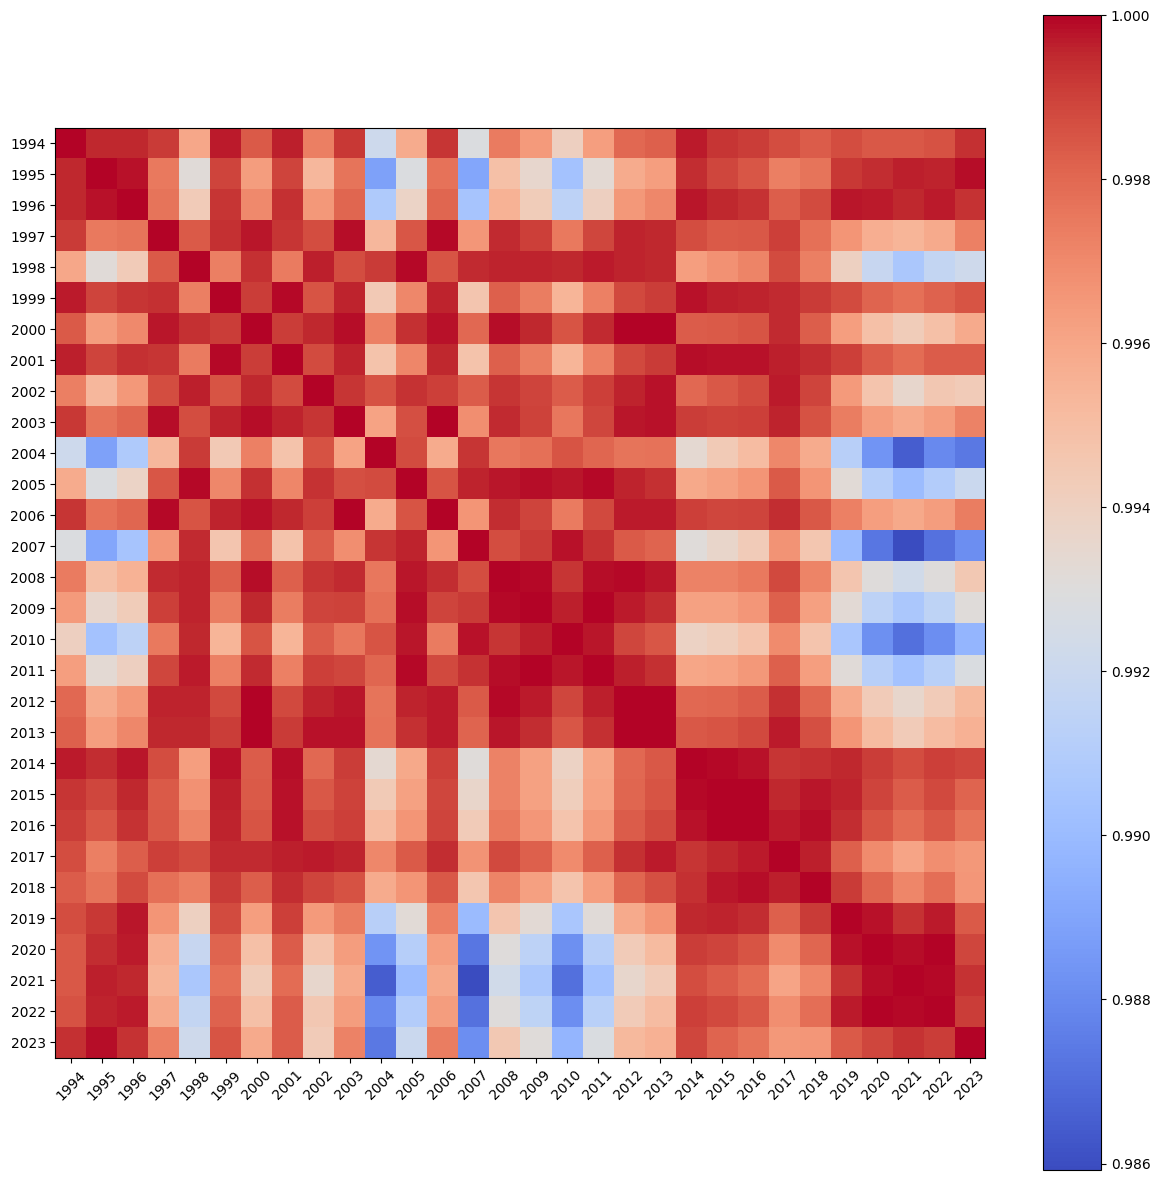

In [89]:
fig = plt.figure(figsize =(15, 15))
plt.imshow(year_total_corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(year_total_corr)), year_total_corr.columns, rotation=45)
plt.yticks(range(len(year_total_corr)), year_total_corr.columns)
plt.grid(False)

seperti yang bisa diliat diatas semakin tinggi data maka semakin gelap juga warnanya dimana warna paling gelapnya berada di garis diagonal